<a href="https://colab.research.google.com/github/yarevaloss/HandGestureRecognition/blob/main/prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mediapipe -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 9.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/images.jpg")
print(image.shape)#shape shows(height, width, number of channels )



AttributeError: 'NoneType' object has no attribute 'shape'

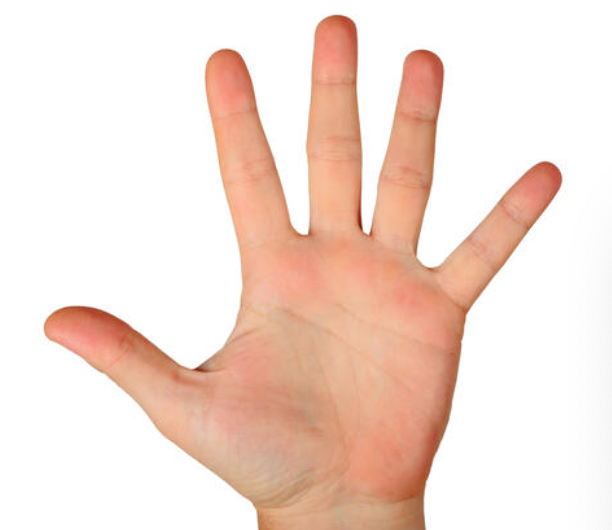

In [ ]:
cv2_imshow(image)

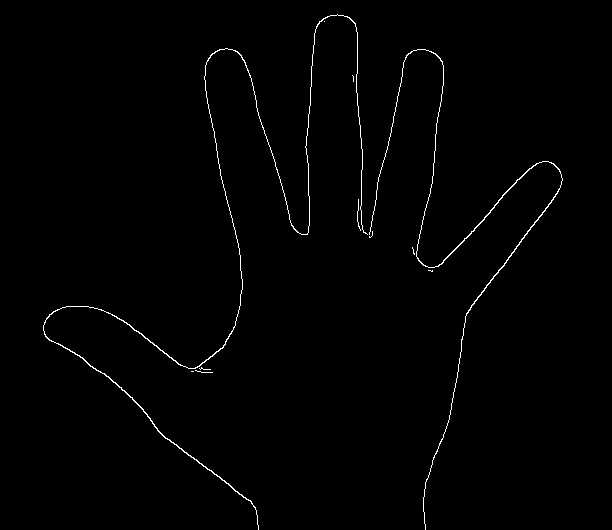

In [ ]:
#edge detection
import cv2

image = cv2.imread("/content/images.jpg") #imread reads the images
canny_image = cv2.Canny(image,150,200)
cv2_imshow(canny_image)


In [ ]:
!wget -q https://storage.googleapis.com/mediapipe-models/gesture_recognizer/gesture_recognizer/float16/1/gesture_recognizer.task

In [ ]:
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

import cv2
from google.colab.patches import cv2_imshow


In [ ]:
base_options = python.BaseOptions(model_asset_path='/content/gesture_recognizer.task')
options = vision.GestureRecognizerOptions(base_options=base_options)
recognizer =vision .GestureRecognizer.create_from_options(options)


In [ ]:
image = mp.Image.create_from_file("/content/images.jpg")
recognition_result = recognizer.recognize(image)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
dir(recognition_result)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'gestures',
 'hand_landmarks',
 'hand_world_landmarks',
 'handedness']

In [ ]:
recognition_result.gestures[0][0]

Category(index=-1, score=0.6439705491065979, display_name='', category_name='Open_Palm')

In [ ]:
name =recognition_result.gestures[0][0].category_name
score = recognition_result.gestures[0][0].score
print(name, score)

Open_Palm 0.6439705491065979


In [ ]:
cordinates = recognition_result.hand_landmarks[0][4]
cordinates.x,cordinates.y

(0.10236868262290955, 0.6142157316207886)

In [ ]:
recognition_result.handedness

[[Category(index=1, score=0.9530676007270813, display_name='Left', category_name='Left')]]